<a href="https://www.kaggle.com/code/taruchit/airline-review-sentiment-analysis?scriptVersionId=278982639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# To analyze the sentiment of feedback received by airlines

* The goal of the project is to analyze the feedback received from airline customers and derive information for areas to improve.
* By performing sentiment analysis on the customer feedback, it would help to automatically classify the experience of difference passengers based on the emotions of text in their feedback.

# Sentiment analysis dictionaries
* It contains information about emotions or polarity expressed by words, phrases or concepts.
* The dictionary provides more than one or more than one scores for each word.
* The score is used to compute the sentiment of complete sentence.

# Types of sentiment analysis dictonaries
1. SentiWordNet: -
   * It assigns scores to WordNet synsets instead of words.
   * Each synset has a positivity and a negativity score lying between 0 and 1.
   * It has around 150,000 words.
   * Scores would change based on the meaning.
     
2. SentiWords: -
    * Here we assign sentiment scores directly to words rather to synsets.
    * This is called prior polarities: Polarity of words independent of their context.
    * It has around 150,000 words.
   
3. VADER: -
    * It is a lexicon and rule-based sentiment analysis tool.
    * It is built manually, thus, it has lesser number of words: around 7000.

# Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

# Loading the dataset

In [2]:
airline_df=pd.read_csv("/kaggle/input/airline-reviews/Airline_Reviews.csv")
#Keeping a copy of the dataset
orig_airline_df=airline_df.copy(deep=True)

In [3]:
#Checking number of rows and columns
airline_df.shape

(23171, 20)

In [4]:
#Printing first 5 rows
airline_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [5]:
#Printing last 5 rows
airline_df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes
23170,23170,ZIPAIR,1,"""lost all of our money with no refund""",20th May 2022,True,They lied about connection in Narita and we ...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,May 2022,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no


In [6]:
#Couting the number of missing values in the dataset.
airline_df.isnull().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

# EDA

In [7]:
airline_df['Overall_Rating'].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: count, dtype: int64

Here we observed for column: Overall_Rating, we have an entry 'n', which has 842 occurrences in the column.

In [8]:
#Computing Overall_Rating with respect to Recommended
overallRating_recommended_table=pd.crosstab(airline_df["Overall_Rating"],
                                            airline_df["Recommended"])
overallRating_recommended_table

Recommended,no,yes
Overall_Rating,,
1,9327,2268
2,2264,32
3,1304,52
4,777,82
5,567,263
6,182,494
7,62,1130
8,35,1722
9,9,1759


From the above result, we can infer that the customers who have given Overall_rating as 'n', do no recommend the flight to others.

Thus, we find that it is simialr to the condition when Overall_Rating=0.

In [9]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [10]:
#Updating the column: Overall_Rating
airline_df["Overall_Rating"]=airline_df["Overall_Rating"].replace('n','0')
airline_df["Overall_Rating"].unique()

array(['9', '1', '8', '2', '3', '5', '6', '7', '4', '0'], dtype=object)

In [11]:
#Converting data type of Overall_Rating from object to integer.
airline_df["Overall_Rating"]=airline_df["Overall_Rating"].astype(int)
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  int64  
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

<Axes: title={'center': 'Count of Overall Ratings'}, xlabel='Overall_Rating'>

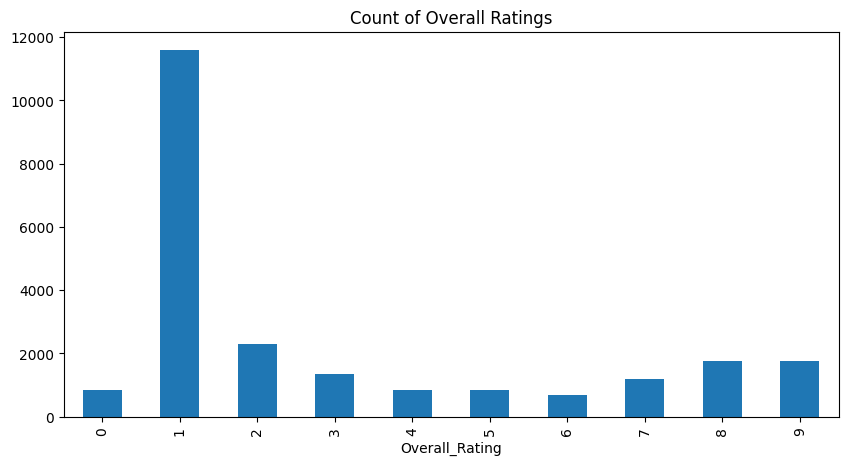

In [12]:
airline_df["Overall_Rating"].value_counts().sort_index().plot(kind="bar", title="Count of Overall Ratings", figsize=(10,5))

There are 10 distinct values in the column: Overall_Rating.

* Overall_Rating=1 has highest frequency, which is close to 12000.
* Each of the remaining 9 ratings have frequency around 2000.

Thus, we can infer that the Overall ratings are biased towards negative feedback.

# Data Cleaning

In [13]:
"""
When checking the count of null values, we observed there are too many null values 
for some of the columns.

Moreover, the goal of this notebook is to analyze and perform sentiment analysis based
on the customer feedback.

Thus, we shall drop all the columns having null values.
Aircraft
Type Of Traveller
Seat Type
Route
Date Flown
Seat Comfort
Cabin Staff Service
Food & Beverages
Ground Service
Inflight Entertainment
Wifi & Connectivity
Value For Money
"""

airline_df.drop(["Aircraft","Type Of Traveller","Seat Type","Route","Date Flown","Seat Comfort","Cabin Staff Service","Food & Beverages","Ground Service","Inflight Entertainment",
"Wifi & Connectivity","Value For Money"],axis=1,inplace=True)

In [14]:
airline_df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,no


In [15]:
airline_df.isnull().sum()

Unnamed: 0        0
Airline Name      0
Overall_Rating    0
Review_Title      0
Review Date       0
Verified          0
Review            0
Recommended       0
dtype: int64

In [16]:
airline_df.shape

(23171, 8)

In [17]:
airline_df.rename(columns={"Unnamed: 0": 'Id'}, inplace=True)
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              23171 non-null  int64 
 1   Airline Name    23171 non-null  object
 2   Overall_Rating  23171 non-null  int64 
 3   Review_Title    23171 non-null  object
 4   Review Date     23171 non-null  object
 5   Verified        23171 non-null  bool  
 6   Review          23171 non-null  object
 7   Recommended     23171 non-null  object
dtypes: bool(1), int64(2), object(5)
memory usage: 1.3+ MB


# Loading the stopwords

In [18]:
nltk.download('stopwords')
print("Printing stopwords: -")
print(stopwords.words('english'))

Printing stopwords: -
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Testing sentiment using NLTK on a random sample

In [19]:
example=airline_df["Review"][100]
example

' We took 3 flights with Aegean and would not recommend them to anyone. Had 3 issues: 1. They overbooked our flight and bumped many people. We bought our flight 3 months ahead, but checked in about 18 hours before our flight (they allow check-in up to 24 hours ahead). We were issued a “standby” ticket without any seats. When we got to the gate, we were told we may or may not get onto the flight and if we didn’t then we would have to wait 4 hours for the late night flight, or try again in the morning. Lots of other people in the same situation. We were never issued boarding passes but we kept following up with the person at the ticket counter until they gave us passes, it seems like due to our persistence and nothing systematic. Luckily we got on that flight, but others didn’t. Nowhere in the policy does it say that whether or not you get on the flight is related to your check-in time. If you take Aegean, check in right away and be persistent about asking for seats! 2. They apply a chec

From the review, based on manual interpretation, it appears to be Negative sentiment.

In [20]:
#Tokenization of review
nltk.word_tokenize(example)

['We',
 'took',
 '3',
 'flights',
 'with',
 'Aegean',
 'and',
 'would',
 'not',
 'recommend',
 'them',
 'to',
 'anyone',
 '.',
 'Had',
 '3',
 'issues',
 ':',
 '1',
 '.',
 'They',
 'overbooked',
 'our',
 'flight',
 'and',
 'bumped',
 'many',
 'people',
 '.',
 'We',
 'bought',
 'our',
 'flight',
 '3',
 'months',
 'ahead',
 ',',
 'but',
 'checked',
 'in',
 'about',
 '18',
 'hours',
 'before',
 'our',
 'flight',
 '(',
 'they',
 'allow',
 'check-in',
 'up',
 'to',
 '24',
 'hours',
 'ahead',
 ')',
 '.',
 'We',
 'were',
 'issued',
 'a',
 '“',
 'standby',
 '”',
 'ticket',
 'without',
 'any',
 'seats',
 '.',
 'When',
 'we',
 'got',
 'to',
 'the',
 'gate',
 ',',
 'we',
 'were',
 'told',
 'we',
 'may',
 'or',
 'may',
 'not',
 'get',
 'onto',
 'the',
 'flight',
 'and',
 'if',
 'we',
 'didn',
 '’',
 't',
 'then',
 'we',
 'would',
 'have',
 'to',
 'wait',
 '4',
 'hours',
 'for',
 'the',
 'late',
 'night',
 'flight',
 ',',
 'or',
 'try',
 'again',
 'in',
 'the',
 'morning',
 '.',
 'Lots',
 'of',
 'ot

In [21]:
tokens=nltk.word_tokenize(example)
#Displaying first 10 tokens
tokens[:10]

['We',
 'took',
 '3',
 'flights',
 'with',
 'Aegean',
 'and',
 'would',
 'not',
 'recommend']

In [22]:
#Running Part of Speech tagger on each token
nltk.pos_tag(tokens)

[('We', 'PRP'),
 ('took', 'VBD'),
 ('3', 'CD'),
 ('flights', 'NNS'),
 ('with', 'IN'),
 ('Aegean', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('recommend', 'VB'),
 ('them', 'PRP'),
 ('to', 'TO'),
 ('anyone', 'NN'),
 ('.', '.'),
 ('Had', 'VBD'),
 ('3', 'CD'),
 ('issues', 'NNS'),
 (':', ':'),
 ('1', 'CD'),
 ('.', '.'),
 ('They', 'PRP'),
 ('overbooked', 'VBD'),
 ('our', 'PRP$'),
 ('flight', 'NN'),
 ('and', 'CC'),
 ('bumped', 'VBD'),
 ('many', 'JJ'),
 ('people', 'NNS'),
 ('.', '.'),
 ('We', 'PRP'),
 ('bought', 'VBD'),
 ('our', 'PRP$'),
 ('flight', 'NN'),
 ('3', 'CD'),
 ('months', 'NNS'),
 ('ahead', 'RB'),
 (',', ','),
 ('but', 'CC'),
 ('checked', 'VBD'),
 ('in', 'IN'),
 ('about', 'IN'),
 ('18', 'CD'),
 ('hours', 'NNS'),
 ('before', 'IN'),
 ('our', 'PRP$'),
 ('flight', 'NN'),
 ('(', '('),
 ('they', 'PRP'),
 ('allow', 'VBP'),
 ('check-in', 'JJ'),
 ('up', 'IN'),
 ('to', 'TO'),
 ('24', 'CD'),
 ('hours', 'NNS'),
 ('ahead', 'RB'),
 (')', ')'),
 ('.', '.'),
 ('We', 'PRP'),
 ('were'

In [23]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('We', 'PRP'),
 ('took', 'VBD'),
 ('3', 'CD'),
 ('flights', 'NNS'),
 ('with', 'IN'),
 ('Aegean', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('recommend', 'VB')]

In [24]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  took/VBD
  3/CD
  flights/NNS
  with/IN
  (PERSON Aegean/NNP)
  and/CC
  would/MD
  not/RB
  recommend/VB
  them/PRP
  to/TO
  anyone/NN
  ./.
  Had/VBD
  3/CD
  issues/NNS
  :/:
  1/CD
  ./.
  They/PRP
  overbooked/VBD
  our/PRP$
  flight/NN
  and/CC
  bumped/VBD
  many/JJ
  people/NNS
  ./.
  We/PRP
  bought/VBD
  our/PRP$
  flight/NN
  3/CD
  months/NNS
  ahead/RB
  ,/,
  but/CC
  checked/VBD
  in/IN
  about/IN
  18/CD
  hours/NNS
  before/IN
  our/PRP$
  flight/NN
  (/(
  they/PRP
  allow/VBP
  check-in/JJ
  up/IN
  to/TO
  24/CD
  hours/NNS
  ahead/RB
  )/)
  ./.
  We/PRP
  were/VBD
  issued/VBN
  a/DT
  “/JJ
  standby/NN
  ”/NN
  ticket/NN
  without/IN
  any/DT
  seats/NNS
  ./.
  When/WRB
  we/PRP
  got/VBD
  to/TO
  the/DT
  gate/NN
  ,/,
  we/PRP
  were/VBD
  told/VBN
  we/PRP
  may/MD
  or/CC
  may/MD
  not/RB
  get/VB
  onto/IN
  the/DT
  flight/NN
  and/CC
  if/IN
  we/PRP
  didn/VBP
  ’/JJ
  t/NN
  then/RB
  we/PRP
  would/MD
  have/VB
  to/TO
  wait/VB
  4/C

# VADER Sentiment scoring

It uses "bag of words" approach.
1. Stop words are removed.
2. Each word is scored and combined to the total score.

It doesn't account for relationship between words of the sentence.



In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [26]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.09, 'neu': 0.871, 'pos': 0.039, 'compound': -0.9724}

compound value lies in the range of -1 to +1.


Here we observed, the compound value of the review is closer to -1. Thus, VADER has successfully classified it as Negative sentiment.

In [27]:
#Running VADER on all reviews of the dataset and capturing the polarity scores.
res={}
for i, row in tqdm(airline_df.iterrows(), total=len(airline_df)):
    text=row['Review']
    review_id=row['Id']
    res[review_id]=sia.polarity_scores(text)

  0%|          | 0/23171 [00:00<?, ?it/s]

In [28]:
res

{0: {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9192},
 1: {'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'compound': -0.9242},
 2: {'neg': 0.031, 'neu': 0.849, 'pos': 0.121, 'compound': 0.7569},
 3: {'neg': 0.193, 'neu': 0.77, 'pos': 0.037, 'compound': -0.96},
 4: {'neg': 0.079, 'neu': 0.846, 'pos': 0.074, 'compound': -0.1416},
 5: {'neg': 0.106, 'neu': 0.811, 'pos': 0.083, 'compound': -0.6106},
 6: {'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'compound': -0.9617},
 7: {'neg': 0.104, 'neu': 0.83, 'pos': 0.065, 'compound': -0.8216},
 8: {'neg': 0.12, 'neu': 0.793, 'pos': 0.087, 'compound': -0.2942},
 9: {'neg': 0.034, 'neu': 0.816, 'pos': 0.15, 'compound': 0.8514},
 10: {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.8476},
 11: {'neg': 0.107, 'neu': 0.83, 'pos': 0.063, 'compound': -0.5504},
 12: {'neg': 0.102, 'neu': 0.862, 'pos': 0.036, 'compound': -0.9305},
 13: {'neg': 0.11, 'neu': 0.794, 'pos': 0.096, 'compound': -0.3792},
 14: {'neg': 0.066, 'neu': 0.917, 'pos': 0.017,

In [29]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':"Id"})
vaders=vaders.merge(airline_df, how="left")

In [30]:
vaders.head()

,Id,neg,neu,pos,compound,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Recommended
0,0,0.000,0.782,0.218,0.9192,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,yes
1,1,0.114,0.878,0.008,-0.9242,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,no
2,2,0.031,0.849,0.121,0.7569,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,no
3,3,0.193,0.770,0.037,-0.9600,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,no
4,4,0.079,0.846,0.074,-0.1416,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,no


[]

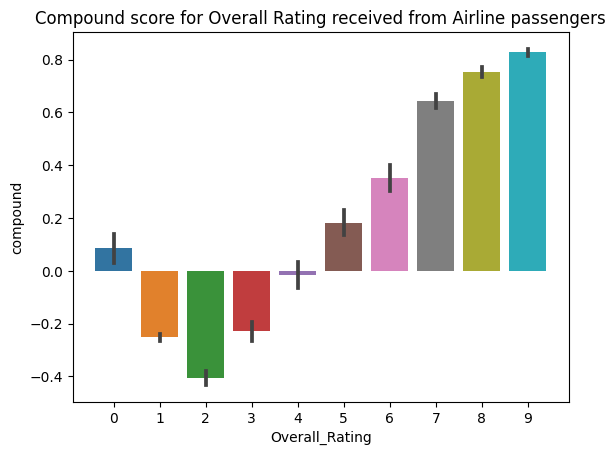

In [31]:
#Bar plot
ax=sns.barplot(data=vaders, x='Overall_Rating', y='compound')
ax.set_title("Compound score for Overall Rating received from Airline passengers")
plt.plot()

Here we observed: -

1. For Overall rating>4, higher the overall rating given by passenger, higher was the compound score computed based on the text feedback.
2. For Overall rating<4, the compound scores computed based on text feedback is negative.
3. For Overall rating=4, the compound score was close to 0. Thus, we can infer it as a neutral feedback.
4. We observed for Overall rating=0, the compound score computed on text feedback is positive.

In [32]:
vaders[vaders['Overall_Rating']==0]

,Id,neg,neu,pos,compound,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Recommended
77,77,0.000,0.629,0.371,0.9493,Adria Airways,0,Adria Airways customer review,4th October 2007,False,BRU-LJU-BRU. Outward flight on a CRJ200 very n...,no
78,78,0.042,0.819,0.140,0.8074,Adria Airways,0,Adria Airways customer review,8th August 2007,False,I often fly with Adria (50 flights per year). ...,no
79,79,0.035,0.788,0.176,0.9649,Adria Airways,0,Adria Airways customer review,14th July 2007,False,LGW-LJU-LGW on an older but clean A320. Outwar...,no
80,80,0.000,0.802,0.198,0.9194,Adria Airways,0,Adria Airways customer review,24th March 2007,False,Frankfurt-Ljubljana-Munich in business class: ...,no
81,81,0.000,0.713,0.287,0.9885,Adria Airways,0,Adria Airways customer review,9th October 2006,False,Zurich-Ljubljana return. About 2 hours+ journe...,no
...,...,...,...,...,...,...,...,...,...,...,...,...
23110,23110,0.055,0.801,0.144,0.9022,Yemenia,0,Yemenia customer review,29th November 2005,False,I fly Yemenia every six months on the route Ri...,no
23111,23111,0.235,0.740,0.025,-0.9471,Yemenia,0,Yemenia customer review,9th January 2004,False,London - Sana'a to Jakarta and found the servi...,no
23112,23112,0.278,0.722,0.000,-0.6124,Yemenia,0,Yemenia customer review,17th November 2003,False,I travelled on Yemenia several times. The main...,no
23113,23113,0.000,0.748,0.252,0.8687,Yemenia,0,Yemenia customer review,23rd October 2003,False,Last summer we flew Sana'a - London return. I ...,no


In [33]:
vaders["Review"][77]

'BRU-LJU-BRU. Outward flight on a CRJ200 very nice - comfortable excellent service and a good breakfast. Return flight on a 737 leased from Ukrainian airlines was also reasonable despite the limited legroom. Earning Star Alliance points also a plus - would recommend.'

In [34]:
vaders["Review"][80]

"Frankfurt-Ljubljana-Munich in business class: the first flight was on a B737 in the colours of Ukraine International and that plane's interior was substandard while the second flight was on a new CRJ. Both flights on time and without glitch. The service is friendly but meals should be improved. Overall they gave the impression of being a pleasant short haul airline."

In [35]:
vaders["Review"][81]

'Zurich-Ljubljana return. About 2 hours+ journey. Both sector uses the Bombardier Regional Jet CRJ200. Small plane but the 2-3 crews on both sectors were friendly and the service efficient. Seats were comfortable and the planes in good clean conditions. Light meals were served - generally a roll here or a pie there plus drinks. The inflight magazine is surprisingly rich with information on Slovenian culture and way of life and is one of the best I have read. You board the planes on the tarmac via buses from the gates though and not through connecting bridges.'

In [36]:
vaders["Review"][23114]

"My trip was from Paris to Sana'a as a tourist and I wish to applaud the Yemenia flight attendants' customer service throughout the long flight. It was a cherishable trip."

In [37]:
vaders["Review"][23111]

"London - Sana'a to Jakarta and found the service bad. I chose for Yemenia because it was the cheapest rate. I never have been in a airline with such rude FA's especially the male attendants! IFE was below average seat was cramed not comfortable inflight catering was OK but the cabin interior was so dirty. I feel sorry for the pax who sit near the restrooms it smells so bad!"

In [38]:
vaders["Review"][23110]

"I fly Yemenia every six months on the route Riyadh-Sana'a (via Aden) and back to Riyadh. They have reasonably new clean aircraft with good legroom and the food is no better or worse than what you are served on short distance economy class journeys on other airlines. Punctuality has been good except once and Yemenis are generally welcoming people which also applies to my experience with Yemenia booking-office staff in Sana'a. However I agree that most airlines in this region offer lower standards of aircraft and service on typical expat flights to Asia and flights with large numbers of deportees from Saudi Arabia can be a mixed experience. Generally I am satisfied with Yemenia and will use them on future flights to Sana'a."

* There are 842 records where Overall rating = 0.
* Sampled 5 random records, and by manually interpretting the feedback it was observed that there are mixed sentiments, some are very positive, some are very negative and some are having both positive and negative feedback.
* As the result, the compound score was positive and closer to 0 when Overall rating was 0.

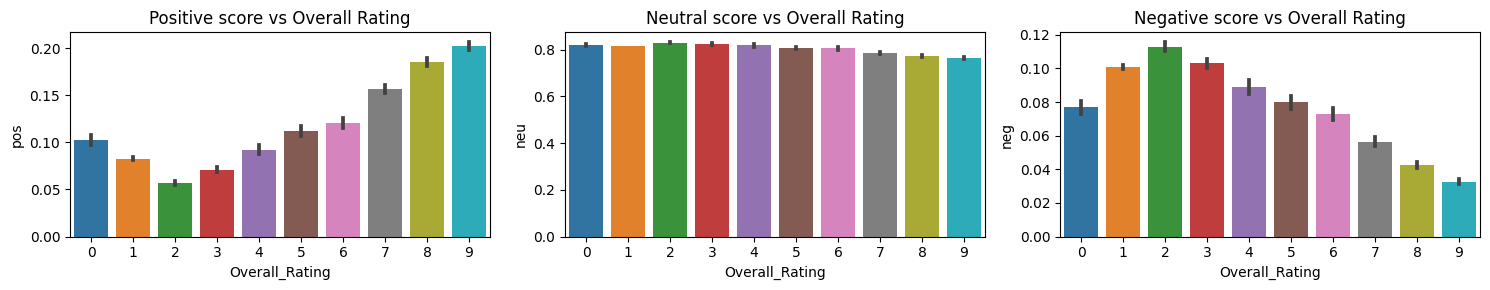

In [39]:
#Bar plot with positive, neutral and negative
fig, axs=plt.subplots(1, 3, figsize=(15,3))
sns.barplot(data=vaders, x='Overall_Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Overall_Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Overall_Rating', y='neg', ax=axs[2])
axs[0].set_title("Positive score vs Overall Rating")
axs[1].set_title("Neutral score vs Overall Rating")
axs[2].set_title("Negative score vs Overall Rating")
plt.tight_layout()
plt.show()

Here we observed: -

* **Neutral score** w.r.t Overall rating is nearly constant. Thus, irrespective of Overall rating given by passenger, Neutral score computed for text feedback is same.
* **Positive score** w.r.t Overall rating increases linearly from Overall rating = 2 to Overall rating = 9. We observed for Overall rating = 0 to Overall rating = 2, the computed Positive score descreases.
* We observed similar pattern for Negative score computed on text feedback.
* **Negative score** w.r.t Overall rating decreases linearly from Overall rating = 2 to Overall rating = 9. We observed for Overall rating = 0 to Overall rating = 2, the computed Negative score decreases.

Based on the pattern observed, we make an assumption that most of the passengers rated more (closer to 9) for positive experience and rated lesser (closer to 0) for negative experience.

But, some passengers misunderstood the rating system, and rated lesser (closer to 0) for positive experiences and rated more (closer to 9) for negative experience.

In order to analyze the records where the text feedback received and the Overall rating score contradict each other, we shall compute a new metric: **contradiction_score**.

contradiction_score=(normalized_overall_rating - compound)^2

normalized_overall_rating=(Overall_rating - 4.5)/4.5

This will enable us to transform Overall_rating in the scale between -1 to +1, which is same as compound score calculated by VADER.

Scenarios: -

1. If Overall_rating = 9 and compound score = +1, then contradiction_score=0
2. If Overall_rating = 9 and compound score = -1, then contradiction_score=4
3. If Overall_rating = 0 and compound score = +1, then contradiction_score=4
4. If Overall_rating = 0 and compound score = -1, then contradiction_score=0

Thus, if contradiction_score is higher and closer to 4, then those customer feedback records may have contradiction between text feedback and the Overall rating given by them.

In [40]:
vaders['normalized_overall_rating']=(vaders['Overall_Rating']-4.5)/4.5
vaders['contradiction_score']=pow(vaders['normalized_overall_rating']-vaders['compound'],2)

In [41]:
vaders.head()

,Id,neg,neu,pos,compound,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Recommended,normalized_overall_rating,contradiction_score
0,0,0.000,0.782,0.218,0.9192,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,yes,1.000000,0.006529
1,1,0.114,0.878,0.008,-0.9242,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,no,-0.777778,0.021439
2,2,0.031,0.849,0.121,0.7569,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,no,-0.777778,2.355236
3,3,0.193,0.770,0.037,-0.9600,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,no,-0.777778,0.033205
4,4,0.079,0.846,0.074,-0.1416,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,no,-0.777778,0.404722


In [42]:
vaders["Review"][77]

'BRU-LJU-BRU. Outward flight on a CRJ200 very nice - comfortable excellent service and a good breakfast. Return flight on a 737 leased from Ukrainian airlines was also reasonable despite the limited legroom. Earning Star Alliance points also a plus - would recommend.'

In [43]:
vaders["Overall_Rating"][77]

0

In [44]:
vaders["contradiction_score"][77]

3.7997704900000002

* Manual interpretation of feedback tells that sentiment of feedback shared by passenger was positive.

* But the Overall rating given was 0.

* Contradiction score is positive and closer to 4 (upper limit).

In [45]:
vaders["Review"][80]

"Frankfurt-Ljubljana-Munich in business class: the first flight was on a B737 in the colours of Ukraine International and that plane's interior was substandard while the second flight was on a new CRJ. Both flights on time and without glitch. The service is friendly but meals should be improved. Overall they gave the impression of being a pleasant short haul airline."

In [46]:
vaders["Overall_Rating"][80]

0

In [47]:
vaders["contradiction_score"][80]

3.68409636

* Manual interpretation of the feedback tells that the sentiment of feedback shared by customer is mixed, some positive and some negative expressions were used.

* But the Overall rating given was 0.

* Contradiction score is positive and closer to 4 (upper limit).

In [48]:
vaders["Review"][81]

'Zurich-Ljubljana return. About 2 hours+ journey. Both sector uses the Bombardier Regional Jet CRJ200. Small plane but the 2-3 crews on both sectors were friendly and the service efficient. Seats were comfortable and the planes in good clean conditions. Light meals were served - generally a roll here or a pie there plus drinks. The inflight magazine is surprisingly rich with information on Slovenian culture and way of life and is one of the best I have read. You board the planes on the tarmac via buses from the gates though and not through connecting bridges.'

In [49]:
vaders["Overall_Rating"][81]

0

In [50]:
vaders["contradiction_score"][81]

3.9541322500000007

* Manual interpretation of the feedback tells that the sentiment of feedback shared by customer is positive.
  
* But the Overall rating given was 0.

* Contradiction score is positive and closer to 4 (upper limit).

In [51]:
vaders["Review"][23110]

"I fly Yemenia every six months on the route Riyadh-Sana'a (via Aden) and back to Riyadh. They have reasonably new clean aircraft with good legroom and the food is no better or worse than what you are served on short distance economy class journeys on other airlines. Punctuality has been good except once and Yemenis are generally welcoming people which also applies to my experience with Yemenia booking-office staff in Sana'a. However I agree that most airlines in this region offer lower standards of aircraft and service on typical expat flights to Asia and flights with large numbers of deportees from Saudi Arabia can be a mixed experience. Generally I am satisfied with Yemenia and will use them on future flights to Sana'a."

In [52]:
vaders["Overall_Rating"][23110]

0

In [53]:
vaders["contradiction_score"][23110]

3.6183648400000004

* Manual interpretation of the feedback tells that the sentiment of feedback shared by customer is mixed, some positive and some negative expressions were used.

* But the Overall rating given was 0.

* Contradiction score is positive and closer to 4 (upper limit).

In [54]:
vaders["Review"][23111]

"London - Sana'a to Jakarta and found the service bad. I chose for Yemenia because it was the cheapest rate. I never have been in a airline with such rude FA's especially the male attendants! IFE was below average seat was cramed not comfortable inflight catering was OK but the cabin interior was so dirty. I feel sorry for the pax who sit near the restrooms it smells so bad!"

In [55]:
vaders["Overall_Rating"][23111]

0

In [56]:
vaders["contradiction_score"][23111]

0.0027984099999999942

* Manual interpretation of the feedback tells that the sentiment of feedback shared by customer is negative.

* Thus, the Overall rating given by the passenger was 0.

* Contradiction score is also closer to 0.

In [57]:
vaders["Review"][23114]

"My trip was from Paris to Sana'a as a tourist and I wish to applaud the Yemenia flight attendants' customer service throughout the long flight. It was a cherishable trip."

In [58]:
vaders["Overall_Rating"][23114]

0

In [59]:
vaders["contradiction_score"][23114]

3.3382944099999996

* Manual interpretation of feedback tells that sentiment of feedback shared by passenger was positive.

* But the Overall rating given was 0.

* Contradiction score is positive and closer to 4 (upper limit).

In [60]:
vaders[vaders['contradiction_score']>=3]

,Id,neg,neu,pos,compound,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Recommended,normalized_overall_rating,contradiction_score
51,51,0.000,0.662,0.338,0.9677,Adria Airways,1,Adria Airways customer review,6th January 2014,False,Flights from LJU to ZRH and back all on time. ...,yes,-0.777778,3.046693
66,66,0.025,0.637,0.338,0.9596,Adria Airways,1,Adria Airways customer review,13th September 2011,False,London Gatwick to Ljubljana and Ljubljana to V...,yes,-0.777778,3.018482
77,77,0.000,0.629,0.371,0.9493,Adria Airways,0,Adria Airways customer review,4th October 2007,False,BRU-LJU-BRU. Outward flight on a CRJ200 very n...,no,-1.000000,3.799770
78,78,0.042,0.819,0.140,0.8074,Adria Airways,0,Adria Airways customer review,8th August 2007,False,I often fly with Adria (50 flights per year). ...,no,-1.000000,3.266695
79,79,0.035,0.788,0.176,0.9649,Adria Airways,0,Adria Airways customer review,14th July 2007,False,LGW-LJU-LGW on an older but clean A320. Outwar...,no,-1.000000,3.860832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23114,23114,0.000,0.734,0.266,0.8271,Yemenia,0,Yemenia customer review,6th May 2003,False,My trip was from Paris to Sana'a as a tourist ...,no,-1.000000,3.338294
23121,23121,0.000,0.668,0.332,0.9747,ZIPAIR,1,"""can highly recommend ZIPAIR""",23rd July 2023,True,A great experience! Everything was easy. Trav...,yes,-0.777778,3.071178
23142,23142,0.027,0.810,0.163,0.9915,ZIPAIR,1,"""I recommend ZIPAIR""",6th March 2023,False,I recommend ZIPAIR. My friend and I booked a...,yes,-0.777778,3.130344
23146,23146,0.027,0.737,0.236,0.9783,ZIPAIR,1,"""business class seats were incredibly reasonable""",1st February 2023,True,We chose Zipair because the business class se...,yes,-0.777778,3.083809


In [61]:
vaders.loc[vaders['contradiction_score']>=3,['Review']]

,Review
51,Flights from LJU to ZRH and back all on time. ...
66,London Gatwick to Ljubljana and Ljubljana to V...
77,BRU-LJU-BRU. Outward flight on a CRJ200 very n...
78,I often fly with Adria (50 flights per year). ...
79,LGW-LJU-LGW on an older but clean A320. Outwar...
...,...
23114,My trip was from Paris to Sana'a as a tourist ...
23121,A great experience! Everything was easy. Trav...
23142,I recommend ZIPAIR. My friend and I booked a...
23146,We chose Zipair because the business class se...


In [62]:
vaders["Review"][23164]

'  My issues started before we even flew. I recovered from Covid but was still testing positive for over a week. Had to get a letter from the Japanese Consulate. At first Zipair said they don\'t know if they can accept it and to email a copy in. So I emailed a copy and was told they won\'t accept it. So I called overseas to their Japan HQ and the people there said "They might accept it at LAX, try your luck". No I am not going to try my luck. 12 hours before before my flight was to leave they send me an email saying they can accept the consulate paper. Ridiculous that they are so disorganized. Check-in was easy but their online support said they will add TSA precheck when we check-in. At check-in they refused to do so. On the flight you are only given 1 meal, if you paid in advance and 1 bottle of water - it\'s barely a snack even to Japanese. You are also given the food 1 hour after boarding so enjoy 10 hours of nothing. You will get no more food, water, etc. If you want anything else

In [63]:
vaders.loc[23164,["contradiction_score","Overall_Rating","pos","neu","neg","compound","normalized_overall_rating"]]

contradiction_score            3.1353
Overall_Rating                      1
pos                             0.187
neu                             0.755
neg                             0.057
compound                       0.9929
normalized_overall_rating   -0.777778
Name: 23164, dtype: object

From the above few sampled records we observed that for some of them where contradiction_score is closer to 4 (between 3 and 4): -

* For some passenger feedbacks have incorrect Overall_Rating score when compared to the sentiment of text under Review. Thus, in these cases contradiction_score worked successfully.

* For some passengers the score computed by VADERS for pos, neu, neg and compound was incorrect and the Overall_Rating was correct. Thus, in these cases contradiction_score failed to give correct results.

# Roberta Pretrained Model

* Roberta is a transformer based deep learning model.
* It is a model trained on large corpus of data.
* The model accounts not only for words but also for the context related to other words.

In [64]:
from transformers import AutoTokenizer #Helps to tokenize sentences similar to NLTK
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [65]:
!pip install -U transformers huggingface_hub

  Using cached huggingface_hub-1.1.4-py3-none-any.whl.metadata (13 kB)


In [66]:
#Fetching a pretrained model provided by HuggingFace
task='sentiment'
MODEL=f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

2025-11-17 05:25:19.847239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763357120.136002     126 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763357120.217045     126 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Here we are trying to implement **Transfer learning**.

The model was trained on a large corpus of Twitter dataset, and we will be re-using the weights of that model for our airline review sentiment analysis.

Thus, we do not need to re-train the model, and we can save time my reusing the weights of existing model.

In [67]:
example

' We took 3 flights with Aegean and would not recommend them to anyone. Had 3 issues: 1. They overbooked our flight and bumped many people. We bought our flight 3 months ahead, but checked in about 18 hours before our flight (they allow check-in up to 24 hours ahead). We were issued a “standby” ticket without any seats. When we got to the gate, we were told we may or may not get onto the flight and if we didn’t then we would have to wait 4 hours for the late night flight, or try again in the morning. Lots of other people in the same situation. We were never issued boarding passes but we kept following up with the person at the ticket counter until they gave us passes, it seems like due to our persistence and nothing systematic. Luckily we got on that flight, but others didn’t. Nowhere in the policy does it say that whether or not you get on the flight is related to your check-in time. If you take Aegean, check in right away and be persistent about asking for seats! 2. They apply a chec

In [68]:
#Storing stopwords in a list
stop_words=stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [69]:
#Tokenization
words = nltk.word_tokenize(example)

#Filtering out stop words
filtered_words=[word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a string
filtered_text=" ".join(filtered_words)
filtered_text

'took 3 flights Aegean would recommend anyone . 3 issues : 1 . overbooked flight bumped many people . bought flight 3 months ahead , checked 18 hours flight ( allow check-in 24 hours ahead ) . issued “ standby ” ticket without seats . got gate , told may may get onto flight ’ would wait 4 hours late night flight , try morning . Lots people situation . never issued boarding passes kept following person ticket counter gave us passes , seems like due persistence nothing systematic . Luckily got flight , others ’ . Nowhere policy say whether get flight related check-in time . take Aegean , check right away persistent asking seats ! 2 . apply checked bag policy . sitting near gate . gate attendants approached us asked weigh bags . bags , fit easily overhead bin ( including previous Aegean flights ) found slightly overweight ( apparently 9kgs allowed , 10kgs ) . asked could move 1kg purse / backpack . said , need check two bags , way charging us 40Euro per bag . 45 min flight island Athens .

In [70]:
#Encoding the above review in the format that the model can understand
tokenizer(filtered_text, return_tensors='pt')

{'input_ids': tensor([[    0,    90,  6576,   155,  4871, 34902,  1899,   260,    74,  5940,
          1268,   479,   155,   743,  4832,   112,   479,    81,  6298,   196,
          2524, 26663,   171,    82,   479,  2162,  2524,   155,   377,   789,
          2156,  7869,   504,   722,  2524,    36,  1157,  1649,    12,   179,
           706,   722,   789,  4839,   479,  1167,    44,    48, 28611,    44,
            46,  3682,   396,  3202,   479,   300,  8751,  2156,   174,   189,
           189,   120,  2500,  2524,    44,    27,    74,  2067,   204,   722,
           628,   363,  2524,  2156,   860,   662,   479, 23784,    82,  1068,
           479,   393,  1167, 16011,  3974,  1682,   511,   621,  3682,  3231,
           851,   201,  3974,  2156,  1302,   101,   528, 31512,  1085, 20552,
           479, 17397,   300,  2524,  2156,   643,    44,    27,   479,   978,
         10859,   714,   224,   549,   120,  2524,  1330,  1649,    12,   179,
            86,   479,   185, 34902,  

In [71]:
encoded_text=tokenizer(filtered_text, return_tensors='pt')

In [72]:
#Running the model based on encoded text
output=model(**encoded_text)
output

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.0106,  0.5353, -1.6467]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

If we run the model original text, it gives below error: -

RuntimeError                              Traceback (most recent call last)
/tmp/ipykernel_98/1205589357.py in <cell line: 0>()
      1 #Running the model based on encoded text
----> 2 output=model(**encoded_text)
      3 output

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py in _wrapped_call_impl(self, *args, **kwargs)
   1737             return self._compiled_call_impl(*args, **kwargs)  # type: ignore[misc]
   1738         else:
-> 1739             return self._call_impl(*args, **kwargs)
   1740 
   1741     # torchrec tests the code consistency with the following code

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py in _call_impl(self, *args, **kwargs)
   1748                 or _global_backward_pre_hooks or _global_backward_hooks
   1749                 or _global_forward_hooks or _global_forward_pre_hooks):
-> 1750             return forward_call(*args, **kwargs)
   1751 
   1752         result = None

/usr/local/lib/python3.11/dist-packages/transformers/models/roberta/modeling_roberta.py in forward(self, input_ids, attention_mask, token_type_ids, position_ids, head_mask, inputs_embeds, labels, output_attentions, output_hidden_states, return_dict)
   1186         return_dict = return_dict if return_dict is not None else self.config.use_return_dict
   1187 
-> 1188         outputs = self.roberta(
   1189             input_ids,
   1190             attention_mask=attention_mask,

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py in _wrapped_call_impl(self, *args, **kwargs)
   1737             return self._compiled_call_impl(*args, **kwargs)  # type: ignore[misc]
   1738         else:
-> 1739             return self._call_impl(*args, **kwargs)
   1740 
   1741     # torchrec tests the code consistency with the following code

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py in _call_impl(self, *args, **kwargs)
   1748                 or _global_backward_pre_hooks or _global_backward_hooks
   1749                 or _global_forward_hooks or _global_forward_pre_hooks):
-> 1750             return forward_call(*args, **kwargs)
   1751 
   1752         result = None

/usr/local/lib/python3.11/dist-packages/transformers/models/roberta/modeling_roberta.py in forward(self, input_ids, attention_mask, token_type_ids, position_ids, head_mask, inputs_embeds, encoder_hidden_states, encoder_attention_mask, past_key_values, use_cache, output_attentions, output_hidden_states, return_dict, cache_position)
    791             if hasattr(self.embeddings, "token_type_ids"):
    792                 buffered_token_type_ids = self.embeddings.token_type_ids[:, :seq_length]
--> 793                 buffered_token_type_ids_expanded = buffered_token_type_ids.expand(batch_size, seq_length)
    794                 token_type_ids = buffered_token_type_ids_expanded
    795             else:

RuntimeError: The expanded size of the tensor (554) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 554].  Tensor sizes: [1, 514]

In [73]:
scores=output[0][0].detach().numpy()
scores=softmax(scores)

In [74]:
scores

array([0.5910734 , 0.3674716 , 0.04145497], dtype=float32)

* Negative score: 0.5910734
* Neutral score: 0.3674734
* Positive score: 0.04145497

In [75]:
#Creating a scores dictionary
scores_dict={
    "Roberta_neg":scores[0],
    "Roberta_neu":scores[1],
    "Roberta_pos":scores[2]
}
scores_dict

{'Roberta_neg': 0.5910734, 'Roberta_neu': 0.3674716, 'Roberta_pos': 0.04145497}

**Comparison of the sample output between VADER and Roberta model**

* VADER score: -
  {'neg': 0.09, 'neu': 0.871, 'pos': 0.039, 'compound': -0.9724}
  
* Roberta model: -
  {'Roberta_neg': 0.5910734, 'Roberta_neu': 0.3674716, 'Roberta_pos': 0.04145497}

Thus, we observed that both VADER and Roberta model classify the sentiment of the sample review as **Negative**.

In [76]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [ ]:
res={}
for i, row in tqdm(airline_df.iterrows(), total=len(airline_df)):
    try:
        text=row['Review']
        review_id=row['Id']

        #Tokenization
        words = nltk.word_tokenize(text)

        #Filtering out stop words
        filtered_words=list()
        filtered_words=[word for word in words if word.lower() not in stop_words]

        # Join the filtered words back into a string
        filttered_text=""
        filtered_text=" ".join(filtered_words)
        filtered_text
    
        vader_result=sia.polarity_scores(filtered_text)
        vader_result_rename={}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
            roberta_result=polarity_scores_roberta(filtered_text)
        both={**vader_result_rename, **roberta_result}
        res[review_id]=both
    except RuntimeError:
        print(f"Skipped for review id: {review_id}")        

  0%|          | 0/23171 [00:00<?, ?it/s]

Skipped for review id: 429
Skipped for review id: 783
Skipped for review id: 1804


In [ ]:
res

Here we first removed the stop words from each review.

This helped to reduce size of the input whose sentiment needs to be analyzed.

However, it has its own limitations such as losing context which may be critical to accurately determining sentiment of the passenger's review.

Thus, we will also compute another set of sentiment scores, without removal of stop words and compare how the results differ.

In [ ]:
res_with_stopwords={}
for i, row in tqdm(airline_df.iterrows(), total=len(airline_df)):
    try:
        text=row['Review']
        review_id=row['Id']

        vader_result=sia.polarity_scores(text)
        vader_result_rename={}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
            roberta_result=polarity_scores_roberta(text)
        both={**vader_result_rename, **roberta_result}
        res_with_stopwords[review_id]=both
    except RuntimeError:
        print(f"Skipped for review id: {review_id}")        

In [ ]:
res_with_stopwords